## Анализ рынка автомобилей

В данном проекте рассмотрим данные из тренировочного датасета "Car sales", взятого с Kaggle, который содержит информацию о продажах различных марок и моделей автомобилей на рынке США (период неизвестен) и попытаемся определить влияние различных характеристик на количество продаж.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
from sympy import symbols, IndexedBase, Idx
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.shape

(157, 16)

В датафрейме имеются 157 записей в 11 столбцах.
Посмотрим, какая информация указана в столбцах:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

0   Manufacturer - Производитель<br>
1   Model - Модель автомобиля<br>
2   Sales_in_thousands - количество проданных автомобилей в тыс. шт.<br>
3   __year_resale_value - остаточная стоимость через 5 лет<br>
4   Vehicle_type - тип автомобиля<br>
5   Price_in_thousands - цена в тыс. $<br>
6   Engine_size - Объём двигателя<br>
7   Horsepower - мощность в л.с.<br>
8   Wheelbase - длина колёсной базы в дюймах<br>
9   Width - ширина автомобиля в дюймах<br>
10  Length - длина автомобиля в дюймах<br>
11  Curb_weight - снаряжённая масса автомобиля в тыс. фунтов<br>
12  Fuel_capacity - объём топливного бака в галлонах<br>
13  Fuel_efficiency - топливная эффективность в миллях на галлон<br>
14  Latest_Launch - дата окончания выпуска автомобиля<br>
15  Power_perf_factor - коэффициент производительности двигателя

Удалим столбцы, которые для дальнейшего анализа не пригодятся, а именно информацию о размерах и массе автомобиля, объём топливного бака, дату окончания выпуска и коэффициент производительности двигателя. А так же проверим, какая информация содержится в столбце "Vehicle_type":

In [5]:
df['Vehicle_type'].unique()

array(['Passenger', 'Car'], dtype=object)

In [6]:
df[df['Vehicle_type'] == 'Passenger'].tail()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
152,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


In [7]:
df[df['Vehicle_type'] == 'Car'].tail()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
140,Toyota,Tacoma,84.087,9.575,Car,11.528,2.4,142.0,103.3,66.5,178.7,2.580,15.1,23.0,8/1/2011,55.297117
141,Toyota,Sienna,65.119,NaN,Car,22.368,3.0,194.0,114.2,73.4,193.5,3.759,20.9,22.0,10/5/2012,78.027219
142,Toyota,RAV4,25.106,13.325,Car,16.888,2.0,127.0,94.9,66.7,163.8,2.668,15.3,27.0,5/6/2011,51.955109
143,Toyota,4Runner,68.411,19.425,Car,22.288,2.7,150.0,105.3,66.5,183.3,3.440,18.5,23.0,3/7/2011,62.355577
144,Toyota,Land Cruiser,9.835,34.080,Car,51.728,4.7,230.0,112.2,76.4,192.5,5.115,25.4,15.0,9/25/2011,102.528984


Как мы видим, в столбце "Vehicle_type" присутствует всего два типа - 'Car' и ' Passenger', которые не несут в себе особо важной информации, поэтому данный столбец тоже удаляем.

In [8]:
df = df.drop(['Vehicle_type', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Power_perf_factor', 'Latest_Launch'], axis=1)

Далее необходимо проверить столбцы на отсутствие значений:

In [9]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Fuel_efficiency         3
dtype: int64

Пропущенные значения в большом количестве имеются в столбце "остаточная стоимость". Подставим вместо них среднее значение по столбцу. Пропущенных значений в столбцах "Объём двигателя", "Мощность", "Цена" немного, поэтому подставим их вручную, а показатель "Топливная эффективность" расчитаем.

In [10]:
df['__year_resale_value'] = df['__year_resale_value'].fillna(df['__year_resale_value'].mean())

In [11]:
# Проверяем, в каких строках нет данных о цене
df[df['Price_in_thousands'].isnull()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency
2,Acura,CL,14.114,18.225,NaN,3.2,225.0,26.0
33,Chrysler,Town & Country,53.480,19.540,NaN,NaN,NaN,NaN


In [12]:
# Подставляем значения цены, взятые из интернета
df['Price_in_thousands'][2] = 11.363
df['Price_in_thousands'][33] = 12.163

In [13]:
# Проверяем, в каких строках не указан объём двигателя
df[df['Engine_size'].isnull()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency
33,Chrysler,Town & Country,53.48,19.54,12.163,NaN,NaN,NaN


In [14]:
# Подставляем значения объёма ДВС и его мощности
df['Engine_size'][33] = 3.3
df['Horsepower'][33] = 150

In [15]:
fef = IndexedBase('Fef')
hp = IndexedBase('Hp')
mean, in_cell = symbols('cp cell', cls=Idx)

Расчитаем показатель "Топливная эффективность" по формуле:

In [16]:
expr = (fef[mean]) * (hp[in_cell]) / hp[mean]
expr

Fef[cp]*Hp[cell]/Hp[cp]

In [17]:
# Проверяем, в каких строках показатель топливной эффективности Nan
df[df['Fuel_efficiency'].isnull()]

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_efficiency
33,Chrysler,Town & Country,53.480,19.540000,12.163,3.3,150.0,NaN
38,Dodge,Intrepid,88.028,12.275000,22.505,2.7,202.0,NaN
109,Oldsmobile,Intrigue,38.554,18.072975,24.150,3.5,215.0,NaN


In [18]:
# Рассчитываем показатель
for cell in (33, 38, 109):
    df['Fuel_efficiency'][cell] = df['Fuel_efficiency'].mean() * df['Horsepower'][cell] / df['Horsepower'].mean()

И наконец необходимо привести данные в таблице к международному стандарту. Пересчитаем топливную эффективность в расход топлива (л/100 км):

In [19]:
# перевод миль/гал в л/100*км
df['Fuel_efficiency'] = 100 / (df['Fuel_efficiency'] * (1.609344 / 3.789411784))

### Визуализация

Посмотрим, какое суммарное количество различных моделей автомобилей продано по каждому производителю, а так же самые продаваемые модели.

In [20]:
sales = df.groupby('Manufacturer')['Sales_in_thousands'].sum() # группировка по производителям

In [21]:
sales = sales.to_frame() # convert panda.series in frame

In [22]:
sales.reset_index(inplace=True)

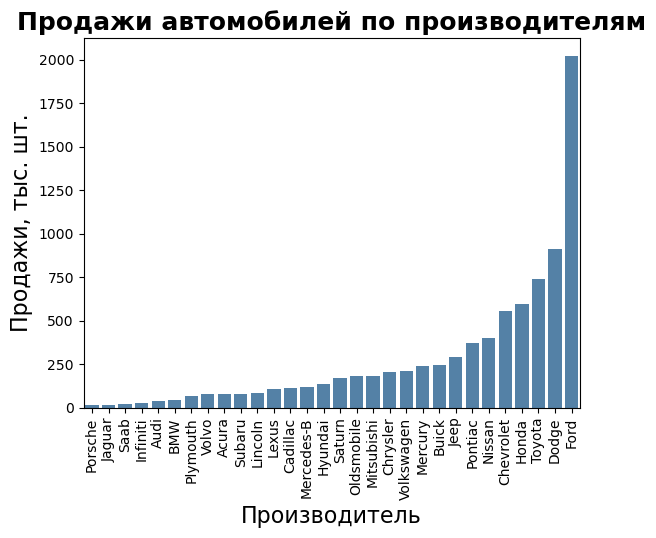

In [23]:
sns.barplot(x='Manufacturer',
            y='Sales_in_thousands',
            data=sales,
            order=sales.sort_values('Sales_in_thousands').Manufacturer,
            color='steelblue')
plt.xlabel('Производитель', size=16)
plt.ylabel('Продажи, тыс. шт.', size=16)
plt.title('Продажи автомобилей по производителям', size=18, weight=800)
plt.xticks(rotation=90)
plt.show()

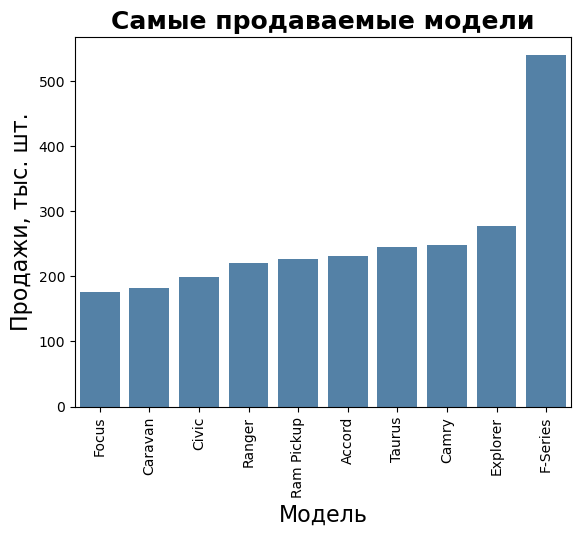

In [24]:
sns.barplot(x='Model',
            y='Sales_in_thousands',
            data=df,
            order=df.sort_values('Sales_in_thousands').Model[-10:],
            color='steelblue')
plt.xlabel('Модель', size=16)
plt.ylabel('Продажи, тыс. шт.', size=16)
plt.title('Самые продаваемые модели', size=18, weight=800)
plt.xticks(rotation=90)
plt.show()

Теперь проверим влияние на показатель продаж объёма двигателя и показателя топливной эффективности.<br>
На последнем графике видно, что продажи самой популярной модели F-Series почти вдвое превышают продажи второй по популярности модели. Проверим, как распределён показатель продаж:

In [25]:
df['Sales_in_thousands'].describe()

count    157.000000
mean      52.998076
std       68.029422
min        0.110000
25%       14.114000
50%       29.450000
75%       67.956000
max      540.561000
Name: Sales_in_thousands, dtype: float64

Третий квартиль составляет 67.956, а максимальный показатель равен 540,561.<br>
Выведем показатели на графике.

<Axes: ylabel='Sales_in_thousands'>

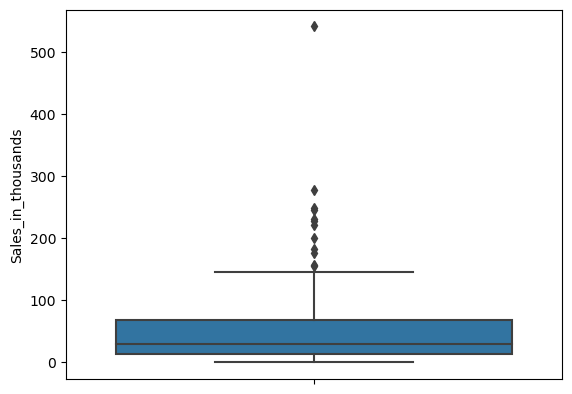

In [26]:
sns.boxplot(y='Sales_in_thousands', data=df)

Для проверки зависимостей продаж от различных показателей, необходимо избавиться от выбросов. Будем использовать межквартильный диапазон.

In [27]:
Q1 = df['Sales_in_thousands'].quantile(q=.25)
Q3 = df['Sales_in_thousands'].quantile(q=.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [28]:
upper_array = np.where(df['Sales_in_thousands'] >= upper)[0]
lower_array = np.where(df['Sales_in_thousands'] <= lower)[0]
 
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

In [29]:
df.shape

(145, 8)

Text(0.5, 1.0, 'Продажи в зависимости от объёма ДВС')

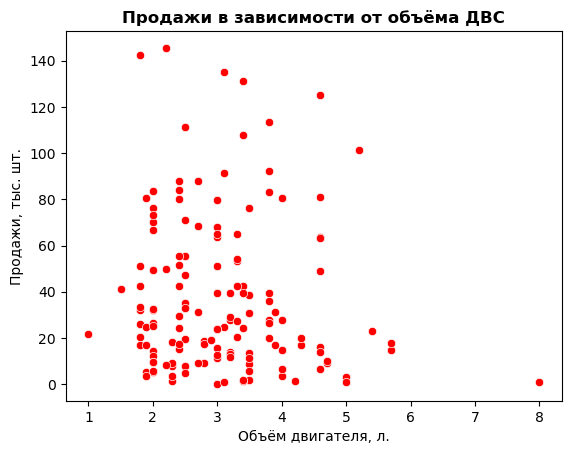

In [30]:
sns.scatterplot(x='Engine_size', y='Sales_in_thousands', data=df, color='red')
plt.xlabel('Объём двигателя, л.')
plt.ylabel('Продажи, тыс. шт.')
plt.title('Продажи в зависимости от объёма ДВС', size=12, weight=600)

In [31]:
sns.scatterplot(x='Fuel_efficiency', y='Sales_in_thousands', data=df_clean, color='green')
plt.xlabel('Средний расход топлива, л/100 км')
plt.ylabel('Продажи, тыс. шт.')
plt.title('Продажи в зависимости от расхода топлива', size=12, weight=600)

NameError: name 'df_clean' is not defined

Text(0.5, 1.0, 'Продажи в зависимости от цены')

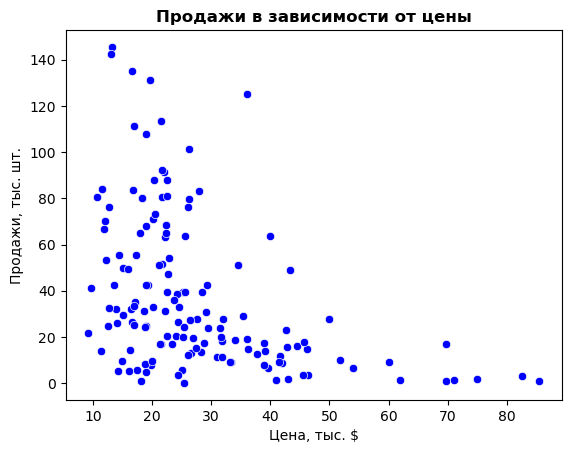

In [32]:
sns.scatterplot(x='Price_in_thousands', y='Sales_in_thousands', data=df, color='blue')
plt.xlabel('Цена, тыс. $')
plt.ylabel('Продажи, тыс. шт.')
plt.title('Продажи в зависимости от цены', size=12, weight=600)

По трём приведённым диаграммам видно, что объём двигателя и расход топлива сщественно не влияют на количество продаж, а ключевым показателем является цена автомобиля (наибольшее количество продаж имеют модели в ценовом диапазоне 15-25 тыс. $).<br>
Проверим это численно.

In [33]:
# Корреляция кол-во продаж / объём ДВС
df['Engine_size'].corr(df['Sales_in_thousands'])

-0.07263079878775838

In [34]:
# Корреляция кол-во продаж / расход топлива
df['Sales_in_thousands'].corr(df['Fuel_efficiency'])

-0.10505302655363742

In [35]:
# Корреляция кол-во продаж / цена
df['Sales_in_thousands'].corr(df['Price_in_thousands'])

-0.42236726370338756

Как видим из показателей корреляции, объём двигателя и средний расход топлива слабо влияют на популярность модели автомобиля, ключевым фактором является цена.